# Case Study 7:  Newton's Method

Part of the purpose of this case study is to gain some experience with aspects of numerical precision.  The Sage docs for the various options for real and complex numbers are [here](https://doc.sagemath.org/html/en/reference/rings_numerical/index.html).  For now, just take a moment to internalize the fact that there's no way to keep a real number in a computer.

Newton's method is an iterative method to find a root to an equation.  For example, given $f(x) = x^2 - 5$, start with any "guess" such as $x_0=4$, and then iterate like so:
$$
x_i = x_{i-1} - \frac{f(x)}{f'(x)}.
$$
Write a small program/function that implements this for $f(x) = x^2 - 5$ and real numbers.  It should spit out the iterations $x_0, x_1, \ldots$ for as many as you want (the number of iterates to show should be an argument).

In [16]:
def newton( z, n ): 
    # z = initial guess
    # n = number of iterates to show
    iterates = [z]
    for i in range(n):
        z = z - ( z^2-5 )/(2*z)
        iterates.append(z)
    return iterates

Try it!

In [17]:
newton(4, 4)

[4, 21/8, 761/336, 1143601/511392, 2615432135521/1169656805184]

Ok, if you didn't force your numbers to be real, you are actually getting rational numbers out, which becomes very complicated-looking very fast.  Instead, make this take place in the *real numbers*.  To make a rational or integer `z` into a real number in sage, you do `RR(z)`.  Call this updated version of your function `newton_real`.

In [18]:
def newton_real( z, n ): 
    # x = initial guess
    # n = number of iterates to show
    z = RR(z)
    iterates = [z]
    for i in range(n):
        z = z - ( z^2 - 5 )/(2*z)
        iterates.append(z)
    return iterates

In [19]:
newton_real(4, 4)

[4.00000000000000,
 2.62500000000000,
 2.26488095238095,
 2.23625125148614,
 2.23606798500998]

Looks good, let's go further!

In [20]:
out = newton_real(4, 100)
# let's just view the tail
out[-8:] # this looks at the last 8 entries, i.e. entry -8, -7, ... end=-1

[2.23606797749979,
 2.23606797749979,
 2.23606797749979,
 2.23606797749979,
 2.23606797749979,
 2.23606797749979,
 2.23606797749979,
 2.23606797749979]

Compare to the *actual* roots of the equation (I trust you can solve it!).  

In [21]:
RR(sqrt(5))

2.23606797749979

Great!  (I hope.)

BTW, why does this work?  Calculus homework!  A good way to see it is to draw a picture of the iteration process on a graph.  I've done this for you just because I couldn't resist.

In [57]:
def newton_picture( z, n ): 
    # green = parabola
    G = plot( x^2 - 5, color="green", xmin = -5, xmax = 5 )
    z = RR(z)
    # blue = initial root guess and tangent to curve at that x-coordinate
    G += plot( + (z^2 - 5) + 2*z*(x - z), color="blue", xmin = -5, xmax = 5 )
    G += point( (z, 0), color="blue", xmin = -5, xmax = 5, size = 20)
    G += point( (z, z^2 - 5), color="blue", xmin = -5, xmax = 5, size = 20)
    for i in range(n):
        z = z - ( z^2 - 5 )/(2*z)
        # red = intersection of that blue line with x-axis as new root guess
        G += plot( + (z^2 - 5) + 2*z*(x - z), color="red", xmin = -5, xmax = 5)
        G += point( (z, 0), color="red", xmin = -5, xmax = 5, size = 20)
        G += point( (z, z^2 - 5), color="red", xmin = -5, xmax = 5, size = 20)
    return G

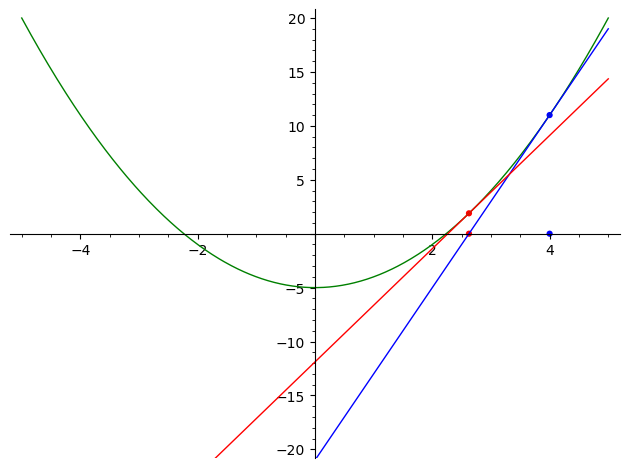

In [58]:
newton_picture( 4, 1 ).show( xmin = -5, xmax = 5, ymin = -20 )

## Polynomials, symbolic variables

Ok, now let's modify our newton function.  The new one will take in any polynomial.  To do this, we need to be comfortable with polynomials and derivatives.  Check this out!

In [7]:
f = x^2 - 5
f.derivative()

2*x

Sage is a little weird in this regard.  You can deal with polynomials as symbolic objects, or elements of polynomial rings.  When you want a symbolic objects, you need to define variables.  The variable `x` comes preloaded in Sage.  Try this instead:

In [8]:
f = y^2 - 5
f.derivative()

NameError: name 'y' is not defined

So `x` is special!  When you want to make more things symbolic variables, you have to declare them.

In [9]:
x,y = var('x,y') 
f = y^2 - x^2 + x*y
f.derivative(x)

-2*x + y

There's a quirk here in `x,y = var('x,y')`.  This declares the names as well as the variables (hence the repetition).
There's technically a difference between how you refer to variables and how Sage writes them to the screen, these can differ:
* the leftmost x,y are the variables (as you will type them to Sage)
* the rightmost x,y are how Sage will type them to you.

In the next cell, try changing only one of the two and see how confusing it is.  You can mostly forget this remark until it bites you.  Also, you might want to put this back to normal before you move on and get confused later.

In [10]:
x,y = var('x,z') 
f = y^2 - x^2 + x*y
f.derivative(x)

-2*x + z

Here's how you can evaluate polynomials.

In [61]:
f = x^2 - 5
f(x = 2)

-1

Note:  if you declare a polynomial ring like `R.<x> = ZZ[x]`, then `x` is no longer a symbolic variable, but is instead an element of a polynomial ring.  Often this doesn't matter, until it does.  But notice the repetition again: the possible difference between how you write the variable and Sage does.

## Newton Iteration for any polynomial

Ok, enough of that.  Now make `newton_iteration` that takes in a single variable symbolic polynomial `f`.   (Let's call the new one `newton_iteration`; I'll try to avoid repeat names because it can lead to "footgunning"... I'll let you figure that one out).  

In [62]:
def newton_iteration( f, z, n ): 
    # f = poly to find root of
    # z = initial guess
    # n = number of iterates to show
    df = f.derivative()
    z = RR(z)
    iterates = [z]
    for i in range(n):
        z = z - f(x = z)/df(x = z)
        iterates.append(z)
    return iterates

In [63]:
newton_iteration( x^2-5, 4, 4 )

[4.00000000000000,
 2.62500000000000,
 2.26488095238095,
 2.23625125148614,
 2.23606798500998]

In [82]:
# check out this polynomial!
f = (x-1)*(x-1.00000000000001); 
f

(x - 1)*(x - 1.00000000000001)

In [156]:
iters = newton_iteration( f, 10, 150 )
iters[-8:]

[1.00000000000001,
 1.00000000000001,
 1.00000000000001,
 1.00000000000001,
 1.00000000000001,
 1.00000000000001,
 1.00000000000001,
 1.00000000000001]

In [157]:
# I'm just going to expand it out, no precision lost here, right?
g = f.expand()
g

x^2 - 2.00000000000001*x + 1.00000000000001

In [158]:
iters = newton_iteration( g, 10, 150 )
iters[-8:]

[1.00000000737431,
 0.999999992319013,
 1.00000001400026,
 0.999999998140210,
 1.00000005783620,
 1.00000002712261,
 1.00000001074921,
 0.999999990092376]

Wait, that's definitely weird.  What's going on?  It was the *same* polynomial!!

## Computers can't handle real numbers

What's happening is that in the first case, when we plug into `f`, we are plugging into the factored polynomial and then multiplying the factors.  In the second case, we are plugging into `g`, the already expanded polynomial.  It's a different sequence of events.  They are mathematically equivalent in the abstract world of polynomials over the real numbers, but not in Sage.  For the answer, evaluate the next cell.

In [88]:
RR

Real Field with 53 bits of precision

That means that `RR` by default has 53 bits of precision and any extra digits are lost.  So there's rounding error.  And it's a very finicky thing to keep track of what types of operations lose precision at what rate, even when mathematically two options are equivalent!  A computer cannot store real numbers, because real numbers, in their platonic form, have infinite precision.

So what do we do?  We track precision.  For this reason, Sage has a whole bunch of different options for real (and complex) numbers.  Check out the following cells.

In [130]:
RealField(10)

Real Field with 10 bits of precision

In [131]:
RDF # double = 64 bits

Real Double Field

In [132]:
RIF

Real Interval Field with 53 bits of precision

Interval arithmetic is a solution to the precision problem.  The idea is to track the possible error.  So for example, try this:

In [133]:
RIF(sqrt(2))

1.414213562373095?

Do you see the question mark?  What that is saying is that the true square root of $2$ lies between 1.41421356237309 and 1.41421356237310.  Actually -- achtung!! -- they are stored internally in hex, and the decimal printed to the screen is a rounding.  You can rely on them to be correct internally, but the actual endpoints are stored in base 16. 

So elements of RIF are actually intervals.  So you can actually specify them that way.  Let's see our square root in its internal glory:

In [134]:
a = RIF(sqrt(2))
print(a.upper(), a.lower())

1.41421356237310 1.41421356237309


Now here's a very cool trick!  (Using pari under the hood.)

In [135]:
a.algdep(5) # return a polynomial of degree at most 5 that the number satisfies!

x^2 - 2

Ok, so fixed precision is dangerous, and interval arithmetic is frequently the solution.  You can use interval arithmetic via RIF as if the things you are dealing with are numbers, not intervals, but there's some weird gotchas, like comparisons `==`, `<=` etc. (I'll let you read Sage manuals if you want).  Copy `newton_iteration` here as `newton_iteration_RIF` and just cast `z` to RIF instead of RR.

In [149]:
def newton_iteration_RIF( f, z, n ): 
    # f = poly to find root of
    # z = initial guess
    # n = number of iterates to show
    df = f.derivative()
    z = RIF(z)
    iterates = [z]
    for i in range(n):
        z = z - f(x = z)/df(x = z)
        iterates.append(z)
    return iterates

Now try the two polynomials we dealt with above.  You may need to cast the coefficients into RIF.  What happens?

In [151]:
iters = newton_iteration_RIF( (x-RIF(1))*(x-RIF(1.00000000000001)), 4, 25)
iters[-8:]

[1.00001144?,
 1.0000058?,
 1.0000029?,
 1.000002?,
 1.000001?,
 1.000000?,
 [-infinity .. +infinity],
 [-infinity .. +infinity]]

In [152]:
iters = newton_iteration_RIF( x^2 - RIF(2.00000000000001)*x + RIF(1.00000000000001), 4, 13)
iters[-8:]

[1.0468750000?,
 1.02343750?,
 1.011719?,
 1.0059?,
 1.0?,
 [-infinity .. +infinity],
 [-infinity .. +infinity],
 [-infinity .. +infinity]]

It may not be satisfying but the point is that it didn't *lie* to you.

## But which root?

Your challenge now is to write a newton iteration function that works over the complex numbers.  [These](https://doc.sagemath.org/html/en/reference/rings_numerical/index.html) are your tools.  By default Sage understands both `i` and `I` as the complex upper half plane square root of -1 (unless you redefined one of them!).

In [38]:
def newton_iteration_CBF( f, z, n ): 
    # f = poly to find root of
    # z = initial guess
    # n = number of iterates to show
    df = f.derivative()
    z = CBF(z)
    iterates = [z]
    for i in range(n):
        z = z - f(x = z)/df(x = z)
        iterates.append(z)
    return iterates

In [36]:
newton_iteration_CBF( (x-1)*(x-2)*(x-3), i, 30 )

[999.0000000000000,
 [666.666889557636 +/- 5.19e-13],
 [445.11159404157 +/- 4.06e-12],
 [297.40823086587 +/- 4.40e-12],
 [198.93957283479 +/- 6.38e-12],
 [133.2941769439 +/- 3.81e-11],
 [89.5311438807 +/- 5.05e-11],
 [60.356634810 +/- 2.65e-10],
 [40.908231582 +/- 2.45e-10],
 [27.94453376 +/- 3.16e-9],
 [19.30492536 +/- 4.72e-9],
 [13.54947278 +/- 6.69e-9],
 [9.7189376 +/- 3.03e-8],
 [7.1749096 +/- 3.64e-8],
 [5.493423 +/- 3.14e-7],
 [4.394347 +/- 5.74e-7],
 [3.694772 +/- 7.24e-7],
 [3.27819 +/- 6.44e-6],
 [3.07055 +/- 8.29e-6],
 [3.00641 +/- 9.24e-6],
 [3.0001 +/- 5.53e-5],
 [3.0000 +/- 3.20e-5],
 [3.0000 +/- 6.40e-5],
 [3.000 +/- 1.28e-4],
 [3.000 +/- 2.56e-4],
 [3.000 +/- 5.12e-4],
 [3.00 +/- 1.03e-3],
 [3.00 +/- 2.06e-3],
 [3.00 +/- 4.13e-3],
 [3.00 +/- 8.34e-3],
 [3.0 +/- 0.0170]]

Now, write a function which will determine, for an input complex value z, which of the three roots of `(x-1)(x-2)(x-3)` the Newton iteration process will eventually approach.  (To be completely mathematically correct about this probably requires some more mathematical theory of Newton iteration, so do something reasonable.)

In [39]:
def which_root( z ): 
    z = CBF(z)
    for i in range(100):
        z = CBF(z - (z-CBF(1))*(z-CBF(2))*(z-CBF(3))/(CBF(3)*z^2 - CBF(12)*z + CBF(11)))
        if z.contains_exact(1) and not(z.contains_exact(2)) and not(z.contains_exact(3)):
            return 1
        if z.contains_exact(2) and not(z.contains_exact(1)) and not(z.contains_exact(3)):
            return 2
        if z.contains_exact(3) and not(z.contains_exact(2)) and not(z.contains_exact(1)):
            return 3
    return False

In [40]:
which_root( 1+3*i )

3

And now, create a plot of the complex plane where each position is coloured by which root of the polynomial you approach with Newton iteration.  Let's stick to three roots.  So colour the location x+iy green (or whatever) if running Newton iteration with initial value x+iy approaches root 1, blue if it approaches root 2, etc.  Sage is probably *not* the right tool for this type of sophistocated plotting, so I'd do the simplest thing and fill a matrix with the results and then `plot(matrix, cmap='viridis')`.  But if you want to use an excellent tool for this, you could look into [shadertoy](https://www.shadertoy.com/).

In [33]:
d = 1000
m = matrix(d,d)
for i in range(d):
    for j in range(d):
        m[i,j] = which_root( -I +i*10/d + j*10/d*I )
m

1000 x 1000 dense matrix over Integer Ring (use the '.str()' method to see the entries)

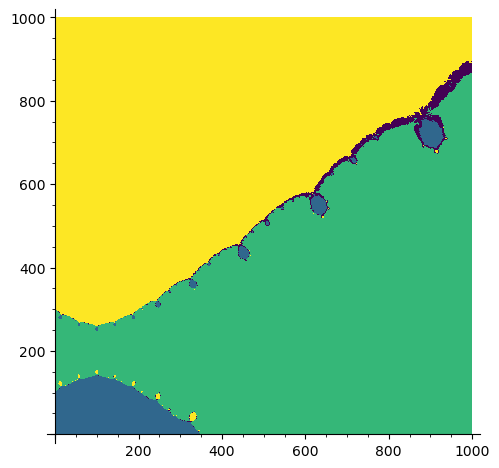

In [34]:
plot(m, cmap='viridis')

Now that you've done that, reward yourself by checking out [Wikipedia's gallery](https://en.wikipedia.org/wiki/Newton_fractal).